In [9]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score

from prettytable import PrettyTable
from astropy.table import Table, Column

from sklearn.ensemble import GradientBoostingClassifier

In [10]:
sample_data = pd.read_csv("heart.csv")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Data is around about 252,000 instances.
print(sample_data.head(10))


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1    

In [11]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(sample_data.columns)

print("\n\nNumber of Instances in Sample Data:",sample_data["ChestPainType"].count())
print("========================================\n")



Attributes in Sample Data:

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Number of Instances in Sample Data: 918



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

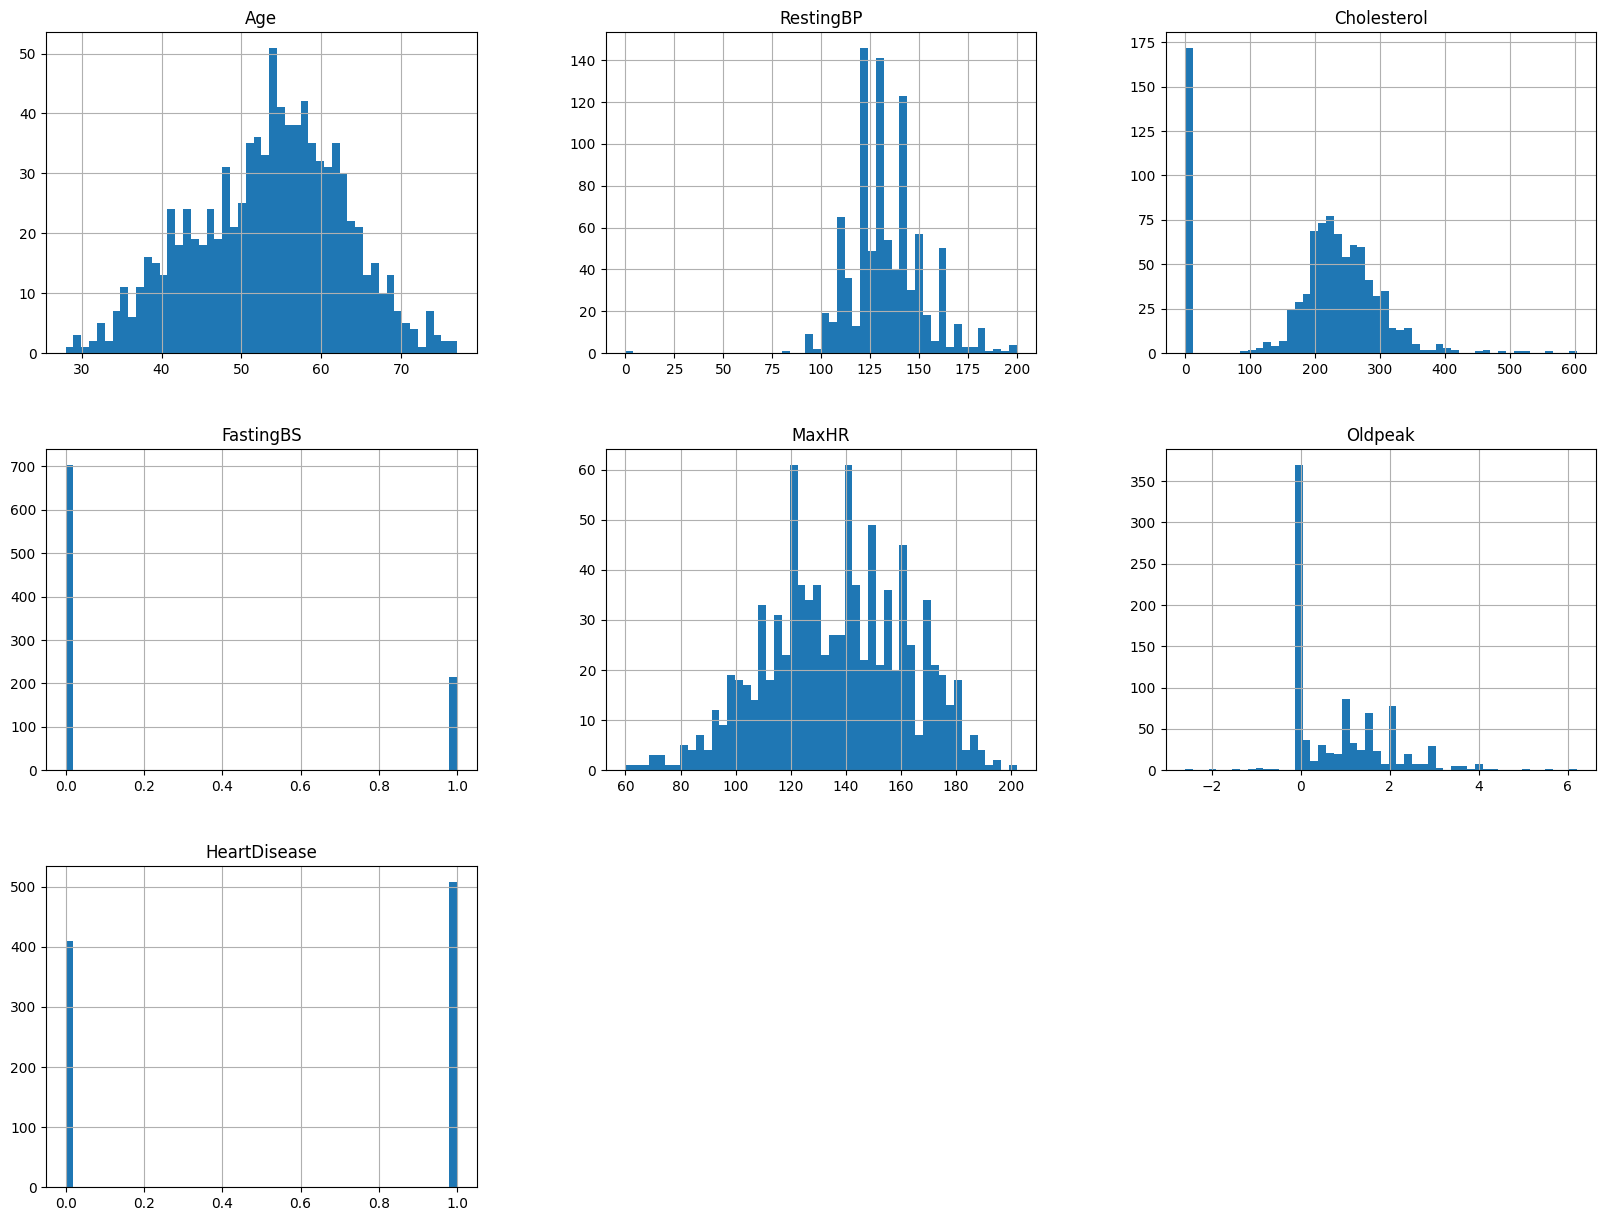

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
sample_data.hist(bins=50,figsize=(20,15))

In [13]:
sample_data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
# Labels

Sex = pd.DataFrame({"Sex":["M","F"]})
ChestPainType= pd.DataFrame({"ChestPainType":["ATA","NAP","ASY","TA"]})
RestingECG = pd.DataFrame({"RestingECG":["Normal","ST","LVH"]})
ExerciseAngina = pd.DataFrame({"ExerciseAngina":["N","Y"]})
ST_Slope=pd.DataFrame(sample_data['ST_Slope'])


# Initialize the Label Encoders

Sex_encoder = LabelEncoder()
ChestPainType_encoder = LabelEncoder()
RestingECG_encoder = LabelEncoder()
ExerciseAngina_encoder=LabelEncoder()
ST_Slope_encoder=LabelEncoder()

# Train the Label Encoders

Sex_encoder.fit(np.ravel(Sex))
ChestPainType_encoder.fit(np.ravel(ChestPainType))
RestingECG_encoder .fit(np.ravel(RestingECG))
ExerciseAngina_encoder.fit(np.ravel(ExerciseAngina))
ST_Slope_encoder.fit(np.ravel(sample_data['ST_Slope']))

LabelEncoder()

In [15]:

sample_data_encoded_input = sample_data.copy()
original_sample_data = sample_data.copy()

# Transform Input Attributes into Numerical Representation

print("\n\nSex Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_Sex"] = Sex_encoder.transform(sample_data['Sex'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["Sex", "encoded_Sex"]].head(20))

print("\n\nChestPainType Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_ChestPainType"] = ChestPainType_encoder.transform(sample_data['ChestPainType'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["ChestPainType", "encoded_ChestPainType"]].head(20))

print("\n\nRestingECG Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_RestingECG"] = RestingECG_encoder.transform(sample_data['RestingECG'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["RestingECG", "encoded_RestingECG"]].head(20))

print("\n\nExerciseAngina Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_ExerciseAngina"] = ExerciseAngina_encoder.transform(sample_data['ExerciseAngina'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["ExerciseAngina", "encoded_ExerciseAngina"]].head(20))


print("\n\nST_Slope Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_ST_Slope"] = ST_Slope_encoder.transform(sample_data['ST_Slope'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["ST_Slope", "encoded_ST_Slope"]].head(20))





# Print Original and Encoded Sample Data

sample_data_encoded_input[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']] = sample_data[['encoded_Sex', 'encoded_ChestPainType', 'encoded_RestingECG','encoded_ExerciseAngina','encoded_ST_Slope']]
print("\n\nOriginal Sample Data:")
print("=====================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(original_sample_data.head(20))
print("\n\nSample Data after Label Encoding:")
print("=================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data_encoded_input.head(20))


# Save the Transformed Features into CSV File
sample_data_encoded_input.to_csv(r'sample-data-encoded.csv', index = False, header = True)



Sex Attribute After Label Encoding:

   Sex  encoded_Sex
0    M            1
1    F            0
2    M            1
3    F            0
4    M            1
5    M            1
6    F            0
7    M            1
8    M            1
9    F            0
10   F            0
11   M            1
12   M            1
13   M            1
14   F            0
15   F            0
16   M            1
17   F            0
18   M            1
19   M            1


ChestPainType Attribute After Label Encoding:

   ChestPainType  encoded_ChestPainType
0            ATA                      1
1            NAP                      2
2            ATA                      1
3            ASY                      0
4            NAP                      2
5            NAP                      2
6            ATA                      1
7            ATA                      1
8            ASY                      0
9            ATA                      1
10           NAP                      2
11          

In [16]:
training_data_encoded, testing_data_encoded = train_test_split( sample_data_encoded_input , test_size=0.2 , random_state=0 , shuffle = False)


# Save the Training and Testing Data into CSV File
training_data_encoded.to_csv(r'training-data-encoded.csv', index = False, header = True)
testing_data_encoded.to_csv(r'testing-data-encoded.csv', index = False, header = True)

# print Training and Testing Data

print("\n\nTraining Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(training_data_encoded.head(20))
print("\n\nTesting Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(testing_data_encoded.head(20))



Training Data:

    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    40    1              1        140          289          0           1   
1    49    0              2        160          180          0           1   
2    37    1              1        130          283          0           2   
3    48    0              0        138          214          0           1   
4    54    1              2        150          195          0           1   
5    39    1              2        120          339          0           1   
6    45    0              1        130          237          0           1   
7    54    1              1        110          208          0           1   
8    37    1              0        140          207          0           1   
9    48    0              1        120          284          0           1   
10   37    0              2        130          211          0           1   
11   58    1              1        136        

In [17]:

print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data_encoded.iloc[: , :-1]
print(input_vector_train.head(20))

print("\n\nOutputs/Labels of Training Data:")
print("================================\n")
print("HeartDisease")
output_label_train = training_data_encoded.iloc[: ,-1]
print(output_label_train.head(20))



Inputs Vectors (Feature Vectors) of Training Data:

    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    40    1              1        140          289          0           1   
1    49    0              2        160          180          0           1   
2    37    1              1        130          283          0           2   
3    48    0              0        138          214          0           1   
4    54    1              2        150          195          0           1   
5    39    1              2        120          339          0           1   
6    45    0              1        130          237          0           1   
7    54    1              1        110          208          0           1   
8    37    1              0        140          207          0           1   
9    48    0              1        120          284          0           1   
10   37    0              2        130          211          0           1   
11   58   

In [18]:
print("\n\nTraining the Support Vector Classifier on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")

gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(input_vector_train, np.ravel(output_label_train))
print(gb_model)



Training the Support Vector Classifier on Training Data


Parameters and their values:

GradientBoostingClassifier(random_state=0)


In [19]:

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")
input_vector_test = testing_data_encoded.iloc[: , :-1]
print(input_vector_test.head(50))

print("\n\nOutputs/Labels of Testing Data:")
print("==============================\n")
print("  HeartDisease")
output_label_test = testing_data_encoded.iloc[: ,-1]
print(output_label_test.head(50))



Inputs Vectors (Feature Vectors) of Testing Data:

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
734   56    1              0        130          283          1           0   
735   49    1              2        120          188          0           1   
736   54    1              0        122          286          0           0   
737   57    1              0        152          274          0           1   
738   65    0              2        160          360          0           0   
739   54    1              2        125          273          0           0   
740   54    0              2        160          201          0           1   
741   62    1              0        120          267          0           1   
742   52    0              2        136          196          0           0   
743   52    1              1        134          201          0           1   
744   60    1              0        117          230          1           1   

In [20]:

# Save the Model in a Pkl File

pickle.dump(gb_model, open('gb_trained_model.pkl', 'wb'))

In [21]:


# Load the Saved Model

model = pickle.load(open('gb_trained_model.pkl', 'rb'))


In [22]:
# Provide Test data to the Trained Model

model_predictions = model.predict(input_vector_test)
testing_data_encoded.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data_encoded["Predictions"] = model_predictions

# Save the Predictions into CSV File

testing_data_encoded.to_csv(r'model-predictions.csv', index = False, header = True)

model_predictions = testing_data_encoded
print("\n\nPredictions Returned by svc_trained_model:")
print("==========================================\n")
print(model_predictions.head(200))



Predictions Returned by svc_trained_model:

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
734   56    1              0        130          283          1           0   
735   49    1              2        120          188          0           1   
736   54    1              0        122          286          0           0   
737   57    1              0        152          274          0           1   
738   65    0              2        160          360          0           0   
739   54    1              2        125          273          0           0   
740   54    0              2        160          201          0           1   
741   62    1              0        120          267          0           1   
742   52    0              2        136          196          0           0   
743   52    1              1        134          201          0           1   
744   60    1              0        117          230          1           1   
745   

In [23]:
# Calculate the Accuracy
model_accuracy_score = accuracy_score(model_predictions["HeartDisease"],model_predictions["Predictions"])

print("\n\nAccuracy Score:")
print("===============\n")
print(round(model_accuracy_score,2))



Accuracy Score:

0.79


In [24]:
# Take Input from User

'''
*---------------- TAKE_USER_INPUT ----------------*
'''
Age_input = input("\nPlease enter Age here: ").strip()
Sex_input = input("\nPlease enter Sex here: ")
ChestPainType_input = input("\nPlease ChestPainType: ").strip()
Cholesterol_input = input("\nPlease Cholesterol: ").strip()
RestingBP_input = input("\nPlease enter RestingBP: ").strip()
RestingECG_input = input("\nPlease enter RestingECG: ").strip()
FastingBS_input = input("\nPlease enter FastingBS: ").strip()
MaxHR_input = input("\nPlease enter MaxHR: ").strip()
Oldpeak_input = input("\nPlease enter OldPeak: ").strip()
ExerciseAngina_input = input("\nPlease enter Excercise Angina : ").strip()
ST_Slope_input = input("\nPlease enter ST_Slope : ").strip()





Please enter Age here: 34

Please enter Sex here: M

Please ChestPainType: ATA

Please Cholesterol: 289

Please enter RestingBP: 150

Please enter RestingECG: Normal

Please enter FastingBS: 0

Please enter MaxHR: 140

Please enter OldPeak: 0.0

Please enter Excercise Angina : N

Please enter ST_Slope : Up


In [25]:
# Convert User Input into Feature Vector

user_input = pd.DataFrame({'Age':[Age_input],'Sex':[Sex_input],'ChestPainType':[ChestPainType_input],'RestingBP':[RestingBP_input], 'Cholesterol': [Cholesterol_input],'FastingBS': [FastingBS_input],'RestingECG': [RestingECG_input],'MaxHR': [MaxHR_input],'ExerciseAngina': [ExerciseAngina_input],'Oldpeak': [Oldpeak_input],'ST_Slope':[ST_Slope_input]})

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

  Age Sex ChestPainType RestingBP Cholesterol FastingBS RestingECG MaxHR  \
0  34   M           ATA       150         289         0     Normal   140   

  ExerciseAngina Oldpeak ST_Slope  
0              N     0.0       Up  


In [26]:
# Transform Input (Categorical) Attributes of Unseen Data into Numerical Representation

unseen_data_features = user_input.copy()
unseen_data_features["Sex"] = Sex_encoder.transform(user_input['Sex'])
unseen_data_features["ChestPainType"] = ChestPainType_encoder.transform(user_input['ChestPainType'])
unseen_data_features["RestingECG"] = RestingECG_encoder.transform(user_input['RestingECG'])
unseen_data_features["ExerciseAngina"] = ExerciseAngina_encoder.transform(user_input['ExerciseAngina'])
unseen_data_features["ST_Slope"] = ST_Slope_encoder.transform(user_input['ST_Slope'])


print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)

print("\n\nUser Input Encoded Feature Vector:")
print("==================================\n")
print(unseen_data_features)



User Input Feature Vector:

  Age Sex ChestPainType RestingBP Cholesterol FastingBS RestingECG MaxHR  \
0  34   M           ATA       150         289         0     Normal   140   

  ExerciseAngina Oldpeak ST_Slope  
0              N     0.0       Up  


User Input Encoded Feature Vector:

  Age  Sex  ChestPainType RestingBP Cholesterol FastingBS  RestingECG MaxHR  \
0  34    1              1       150         289         0           1   140   

   ExerciseAngina Oldpeak  ST_Slope  
0               0     0.0         2  


In [27]:

# Load the Saved Model

model = pickle.load(open('gb_trained_model.pkl', 'rb'))

In [28]:


predicted_heartdisease = model.predict(unseen_data_features)

if(predicted_heartdisease == 1):
    prediction = "Heart Failure Found"
if(predicted_heartdisease == 0):
    prediction = "Heart Failure Not Found"

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction **       ",[prediction])
print(pretty_table)

+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|    Heart Failure Not Found     |
+--------------------------------+
